In [1]:
# need more data for the emotions

In [2]:
import json
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords

# Download nltk packages
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jasmi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jasmi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jasmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

In [4]:
# Load intents file
intents_file = 'intents.json'

with open(intents_file) as file:
    intents = json.load(file)

words = []
classes = []
documents = []
ignore_letters = ['?', '!', '.', ',','\'']

In [5]:
# Iterate over intents
for intent in intents['intents']:
    # Iterate over patterns
    for pattern in intent['patterns']:
        # Tokenize words
        word_list = nltk.word_tokenize(pattern)
        word_list = [lemmatizer.lemmatize(word.lower()) for word in word_list if word not in ignore_letters]
        word_list = [word for word in word_list if word not in stop_words]
        words.extend(word_list)
        # Add documents and corresponding class
        documents.append((word_list, intent['tag']))
        # Add class to classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# Lemmatize and lowercase words, remove ignore letters and stop words
words = sorted(list(set(words)))

# Sort classes
classes = sorted(list(set(classes)))

training = []
output_empty = [0] * len(classes)

In [6]:
# Create training set
for document in documents:
    bag = []
    word_patterns = document[0]
    for word in words:
        bag.append(1) if word in word_patterns else bag.append(0)

    output_row = list(output_empty)
    output_row[classes.index(document[1])] = 1

    training.append([bag, output_row])

# Shuffle training data
np.random.shuffle(training)
training = np.array(training, dtype=object)

In [7]:
# Split training and testing data
train_x, test_x, train_y, test_y = train_test_split(training[:, 0], training[:, 1], test_size=0.3, random_state=42)

# Define model architecture
model = Sequential()
model.add(Dense(64, input_shape=(len(train_x[0]),), activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compile model
sgd = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
history = model.fit(np.array(train_x.tolist()), np.array(train_y.tolist()), epochs=200, batch_size=8, verbose=1, validation_data=(np.array(test_x.tolist()), np.array(test_y.tolist())))

Epoch 1/200
42/42 [==============================] - 1s 7ms/step - loss: 2.0784 - accuracy: 0.1488 - val_loss: 2.0743 - val_accuracy: 0.1736
Epoch 2/200
42/42 [==============================] - 0s 2ms/step - loss: 2.0743 - accuracy: 0.2113 - val_loss: 2.0738 - val_accuracy: 0.1597
Epoch 3/200
42/42 [==============================] - 0s 2ms/step - loss: 2.0702 - accuracy: 0.2083 - val_loss: 2.0733 - val_accuracy: 0.1250
Epoch 4/200
42/42 [==============================] - 0s 2ms/step - loss: 2.0664 - accuracy: 0.2113 - val_loss: 2.0723 - val_accuracy: 0.1528
Epoch 5/200
42/42 [==============================] - 0s 2ms/step - loss: 2.0624 - accuracy: 0.2143 - val_loss: 2.0723 - val_accuracy: 0.1250
Epoch 6/200
42/42 [==============================] - 0s 2ms/step - loss: 2.0588 - accuracy: 0.2202 - val_loss: 2.0714 - val_accuracy: 0.1458
Epoch 7/200
42/42 [==============================] - 0s 3ms/step - loss: 2.0546 - accuracy: 0.2202 - val_loss: 2.0694 - val_accuracy: 0.1736
Epoch 8/200
4

Epoch 59/200
42/42 [==============================] - 0s 2ms/step - loss: 0.2587 - accuracy: 0.9226 - val_loss: 0.7944 - val_accuracy: 0.7847
Epoch 60/200
42/42 [==============================] - 0s 2ms/step - loss: 0.2424 - accuracy: 0.9405 - val_loss: 0.7882 - val_accuracy: 0.7986
Epoch 61/200
42/42 [==============================] - 0s 2ms/step - loss: 0.2204 - accuracy: 0.9464 - val_loss: 0.8056 - val_accuracy: 0.7639
Epoch 62/200
42/42 [==============================] - 0s 3ms/step - loss: 0.2122 - accuracy: 0.9583 - val_loss: 0.8004 - val_accuracy: 0.7708
Epoch 63/200
42/42 [==============================] - 0s 2ms/step - loss: 0.1943 - accuracy: 0.9494 - val_loss: 0.7823 - val_accuracy: 0.7917
Epoch 64/200
42/42 [==============================] - 0s 3ms/step - loss: 0.1809 - accuracy: 0.9613 - val_loss: 0.7981 - val_accuracy: 0.7847
Epoch 65/200
42/42 [==============================] - 0s 2ms/step - loss: 0.1644 - accuracy: 0.9732 - val_loss: 0.8070 - val_accuracy: 0.7778
Epoch 

42/42 [==============================] - 0s 2ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 1.0843 - val_accuracy: 0.8056
Epoch 117/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 1.0753 - val_accuracy: 0.8056
Epoch 118/200
42/42 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 1.0845 - val_accuracy: 0.8125
Epoch 119/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 1.0926 - val_accuracy: 0.8125
Epoch 120/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 1.0872 - val_accuracy: 0.8056
Epoch 121/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 1.0981 - val_accuracy: 0.8125
Epoch 122/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 1.0965 - val_accuracy: 0.8056
Epoch 123/200

42/42 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.2394 - val_accuracy: 0.8056
Epoch 174/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.2476 - val_accuracy: 0.8056
Epoch 175/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.2445 - val_accuracy: 0.8056
Epoch 176/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.2476 - val_accuracy: 0.8056
Epoch 177/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.2464 - val_accuracy: 0.8056
Epoch 178/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.2572 - val_accuracy: 0.8056
Epoch 179/200
42/42 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.2559 - val_accuracy: 0.8056
Epoch 180/200

In [8]:
# Evaluate the model
train_loss, train_accuracy = model.evaluate(np.array(train_x.tolist()), np.array(train_y.tolist()), verbose=0)
test_loss, test_accuracy = model.evaluate(np.array(test_x.tolist()), np.array(test_y.tolist()), verbose=0)

val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# # Save the model
# model.save('emotion_detection_model_w-validation.h5')

# Save the words and classes
words_data = {'words': words}

with open('words.json', 'w') as file:
    json.dump(words_data, file)

classes_data = {'classes': classes}

with open('classes.json', 'w') as file:
    json.dump(classes_data, file)

Train Loss: 0.0027814810164272785
Train Accuracy: 1.0
Test Loss: 1.2945797443389893
Test Accuracy: 0.8055555820465088
Validation Loss: 1.2945798635482788
Validation Accuracy: 0.8055555820465088


In [9]:
# Predict on test data
y_pred = model.predict(np.array(test_x.tolist()))
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(np.array(test_y.tolist()), axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

5/5 [==============================] - 0s 2ms/step
Confusion Matrix:
[[16  0  0  0  0  0  0  0]
 [ 5 16  0  3  1  0  0  0]
 [ 4  1 18  0  0  1  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0  0 15  0  1  2]
 [ 1  0  2  1  0 13  1  0]
 [ 1  2  0  0  0  1  8  0]
 [ 0  0  0  0  1  0  0 14]]


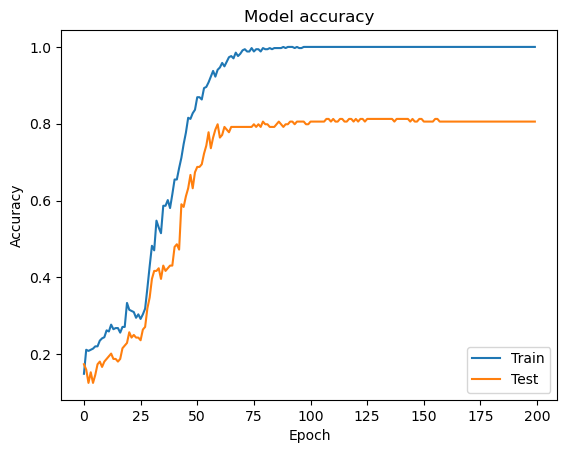

In [10]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

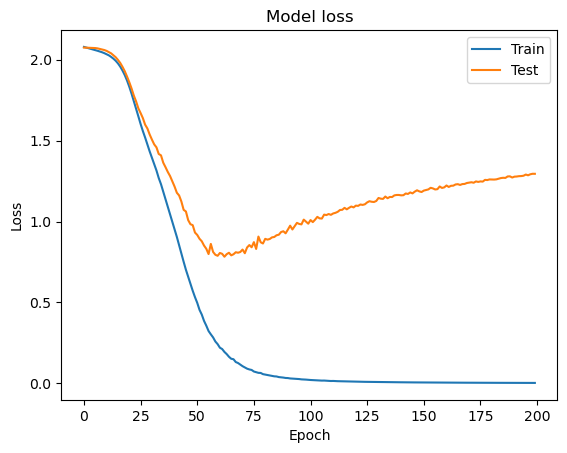

In [11]:
# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [13]:
model.save('chatbot_model_nodrpout.h5')